In [ ]:
import numpy as np
import pandas as pd
import

In [ ]:
get_ipython().system('pip install opencv-python')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
print("Google Drive mounted successfully.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Drive mounted successfully.


In [ ]:
import zipfile
import os

# Define the path to your zip file
zip_file_path = '/content/drive/MyDrive/Datasets/25_nov_2025.zip'

# Define the directory where you want to extract the contents
extract_dir = '/content/drive/MyDrive/unzipped_videos'

# Create the extract directory if it doesn't already exist
os.makedirs(extract_dir, exist_ok=True)

# Check if the zip file exists before proceeding
if os.path.exists(zip_file_path):
    try:
        # Open the zip file in read mode and extract all contents
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(extract_dir)
        print(f"Files successfully unzipped from '{zip_file_path}' to '{extract_dir}'.")
    except zipfile.BadZipFile:
        print(f"Error: '{zip_file_path}' is not a valid zip file.")
    except Exception as e:
        print(f"An error occurred during extraction: {e}")
else:
    print(f"Error: Zip file not found at '{zip_file_path}'. Skipping unzip operation.")


Files successfully unzipped from '/content/drive/MyDrive/Datasets/25_nov_2025.zip' to '/content/drive/MyDrive/unzipped_videos'.


## Collect Video File Paths from Unzipped Folder

### Subtask:
List all video files within the newly unzipped folder (`/content/drive/MyDrive/unzipped_videos`).

**Reasoning**:
To list the video files within the unzipped folder, I will reuse the `get_video_files` function that was previously defined. This function will take the `extract_dir` as input and return a list of video file paths.



In [ ]:
import os

def get_video_files(folder_path):
    """
    Prompts the user for a folder path and returns a list of video file paths within it.
    """
    video_extensions = ('.mp4', '.avi', '.mov', '.mkv', '.flv', '.wmv', '.webm', '.3gp', '.mpeg', '.ogv')
    video_files = []

    if not os.path.exists(folder_path):
        print(f"Error: The path '{folder_path}' does not exist. Please check the path and try again.")
        return []

    print(f"Searching for video files in: {folder_path}")
    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(video_extensions):
                video_files.append(os.path.join(root, file))

    if not video_files:
        print(f"No video files found with extensions {video_extensions} in '{folder_path}' or its subdirectories.")

    return video_files

# Assuming 'extract_dir' is already defined from the previous step as '/content/drive/MyDrive/unzipped_videos'
video_file_paths = get_video_files(extract_dir)

print("\nFound video files in the unzipped folder:")
if video_file_paths:
    for i, file_path in enumerate(video_file_paths):
        print(f"{i+1}. {file_path}")
else:
    print("No video files found in the unzipped folder.")

Searching for video files in: /content/drive/MyDrive/unzipped_videos

Found video files in the unzipped folder:
1. /content/drive/MyDrive/unzipped_videos/25_nov_2025/4.mov
2. /content/drive/MyDrive/unzipped_videos/25_nov_2025/5.mov
3. /content/drive/MyDrive/unzipped_videos/25_nov_2025/7.mov
4. /content/drive/MyDrive/unzipped_videos/25_nov_2025/6.mov
5. /content/drive/MyDrive/unzipped_videos/25_nov_2025/2.mov
6. /content/drive/MyDrive/unzipped_videos/25_nov_2025/3.mov
7. /content/drive/MyDrive/unzipped_videos/25_nov_2025/8.mov
8. /content/drive/MyDrive/unzipped_videos/25_nov_2025/9.mov
9. /content/drive/MyDrive/unzipped_videos/25_nov_2025/14.mov
10. /content/drive/MyDrive/unzipped_videos/25_nov_2025/15.mov
11. /content/drive/MyDrive/unzipped_videos/25_nov_2025/13.mov
12. /content/drive/MyDrive/unzipped_videos/25_nov_2025/11.mov
13. /content/drive/MyDrive/unzipped_videos/25_nov_2025/10.mov
14. /content/drive/MyDrive/unzipped_videos/25_nov_2025/1.mp4
15. /content/drive/MyDrive/unzipped_vi

**Reasoning**:
The previous step listed video files, but included macOS specific metadata files (e.g., `.__MACOSX` directory and `._` prefixed files) which are not actual video files. To accurately collect only valid video file paths for further processing, I need to refine the `get_video_files` function to filter out these irrelevant files. This will ensure that only actual video files are considered for analysis.



In [ ]:
import os

def get_video_files(folder_path):
    """
    Returns a list of actual video file paths within a given folder, filtering out macOS specific files.
    """
    video_extensions = ('.mp4', '.avi', '.mov', '.mkv', '.flv', '.wmv', '.webm', '.3gp', '.mpeg', '.ogv')
    video_files = []

    if not os.path.exists(folder_path):
        print(f"Error: The path '{folder_path}' does not exist. Please check the path and try again.")
        return []

    print(f"Searching for video files in: {folder_path}")
    for root, _, files in os.walk(folder_path):
        for file in files:
            # Exclude macOS resource fork files (prefixed with ._) and files inside __MACOSX directory
            if not file.startswith('._') and '__MACOSX' not in root:
                if file.lower().endswith(video_extensions):
                    video_files.append(os.path.join(root, file))

    if not video_files:
        print(f"No actual video files found with extensions {video_extensions} in '{folder_path}' or its subdirectories after filtering.")

    return video_files

# Assuming 'extract_dir' is already defined from the previous step as '/content/drive/MyDrive/unzipped_videos'
video_file_paths = get_video_files(extract_dir)

print("\nFound actual video files in the unzipped folder after filtering:")
if video_file_paths:
    for i, file_path in enumerate(video_file_paths):
        print(f"{i+1}. {file_path}")
else:
    print("No actual video files found in the unzipped folder after filtering.")

Searching for video files in: /content/drive/MyDrive/unzipped_videos

Found actual video files in the unzipped folder after filtering:
1. /content/drive/MyDrive/unzipped_videos/25_nov_2025/4.mov
2. /content/drive/MyDrive/unzipped_videos/25_nov_2025/5.mov
3. /content/drive/MyDrive/unzipped_videos/25_nov_2025/7.mov
4. /content/drive/MyDrive/unzipped_videos/25_nov_2025/6.mov
5. /content/drive/MyDrive/unzipped_videos/25_nov_2025/2.mov
6. /content/drive/MyDrive/unzipped_videos/25_nov_2025/3.mov
7. /content/drive/MyDrive/unzipped_videos/25_nov_2025/8.mov
8. /content/drive/MyDrive/unzipped_videos/25_nov_2025/9.mov
9. /content/drive/MyDrive/unzipped_videos/25_nov_2025/14.mov
10. /content/drive/MyDrive/unzipped_videos/25_nov_2025/15.mov
11. /content/drive/MyDrive/unzipped_videos/25_nov_2025/13.mov
12. /content/drive/MyDrive/unzipped_videos/25_nov_2025/11.mov
13. /content/drive/MyDrive/unzipped_videos/25_nov_2025/10.mov
14. /content/drive/MyDrive/unzipped_videos/25_nov_2025/1.mp4
15. /content/dr

**Reasoning**:
To extract the FPS and resolution for each video file, I will iterate through the `video_file_paths` list, use `cv2.VideoCapture` to open each video, retrieve the `CAP_PROP_FPS`, `CAP_PROP_FRAME_WIDTH`, and `CAP_PROP_FRAME_HEIGHT` properties, and store the results in a list of dictionaries, handling any potential errors.



In [ ]:
import cv2

video_metadata = []

for video_path in video_file_paths:
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print(f"Error: Could not open video file: {video_path}")
        continue

    try:
        fps = cap.get(cv2.CAP_PROP_FPS)
        width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

        video_metadata.append({
            'file_path': video_path,
            'fps': fps,
            'width': width,
            'height': height
        })
    except Exception as e:
        print(f"Error processing {video_path}: {e}")
    finally:
        cap.release()

print("Extracted metadata for video files:")
for metadata in video_metadata:
    print(metadata)

Extracted metadata for video files:
{'file_path': '/content/drive/MyDrive/unzipped_videos/25_nov_2025/1.mp4', 'fps': 25.0, 'width': 1920, 'height': 1080}
{'file_path': '/content/drive/MyDrive/unzipped_videos/25_nov_2025/4.mov', 'fps': 56.38297872340426, 'width': 2560, 'height': 1600}
{'file_path': '/content/drive/MyDrive/unzipped_videos/25_nov_2025/5.mov', 'fps': 57.411764705882355, 'width': 2560, 'height': 1600}
{'file_path': '/content/drive/MyDrive/unzipped_videos/25_nov_2025/7.mov', 'fps': 43.40425531914894, 'width': 2560, 'height': 1416}
{'file_path': '/content/drive/MyDrive/unzipped_videos/25_nov_2025/6.mov', 'fps': 38.2010582010582, 'width': 2560, 'height': 1440}
{'file_path': '/content/drive/MyDrive/unzipped_videos/25_nov_2025/2.mov', 'fps': 57.077922077922075, 'width': 2560, 'height': 1600}
{'file_path': '/content/drive/MyDrive/unzipped_videos/25_nov_2025/3.mov', 'fps': 56.95652173913044, 'width': 2560, 'height': 1600}
{'file_path': '/content/drive/MyDrive/unzipped_videos/25_no

**Reasoning**:
The video metadata has been extracted and stored in a list of dictionaries. To display this information in a clear, tabular format as requested by the main task, I will convert this list into a pandas DataFrame.



In [ ]:
import pandas as pd

df_video_metadata = pd.DataFrame(video_metadata)

print("Video Metadata Table:")
print(df_video_metadata)

Video Metadata Table:
                                            file_path        fps  width  \
0   /content/drive/MyDrive/unzipped_videos/25_nov_...  25.000000   1920   
1   /content/drive/MyDrive/unzipped_videos/25_nov_...  56.382979   2560   
2   /content/drive/MyDrive/unzipped_videos/25_nov_...  57.411765   2560   
3   /content/drive/MyDrive/unzipped_videos/25_nov_...  43.404255   2560   
4   /content/drive/MyDrive/unzipped_videos/25_nov_...  38.201058   2560   
5   /content/drive/MyDrive/unzipped_videos/25_nov_...  57.077922   2560   
6   /content/drive/MyDrive/unzipped_videos/25_nov_...  56.956522   2560   
7   /content/drive/MyDrive/unzipped_videos/25_nov_...  42.222222   2560   
8   /content/drive/MyDrive/unzipped_videos/25_nov_...  40.942928   2560   
9   /content/drive/MyDrive/unzipped_videos/25_nov_...  49.000000   2558   
10  /content/drive/MyDrive/unzipped_videos/25_nov_...  44.016393   2560   
11  /content/drive/MyDrive/unzipped_videos/25_nov_...  47.118644   2560   
12 

## Final Task

### Subtask:
Summarize the basic video EDA performed, highlighting the FPS and resolution for each video analyzed.


## Summary:

### Q&A
The basic video EDA performed involved unzipping the video archive, collecting video file paths while filtering out irrelevant system files, and then extracting key metadata for each video. For each video analyzed, its Frames Per Second (FPS) and resolution (width and height) were successfully extracted and compiled into a tabular format.

### Data Analysis Key Findings
*   The `opencv-python` library, essential for video processing, was found to be already installed.
*   The video archive `25_nov_2025.zip` was successfully unzipped from `/content/drive/MyDrive/Datasets/` to the designated directory `/content/drive/MyDrive/unzipped_videos`.
*   The video file collection process was refined to accurately identify actual video files by excluding macOS-specific metadata files (e.g., those starting with `._` or located in `__MACOSX` directories).
*   For every identified video file, its Frames Per Second (FPS), width, and height (resolution) were successfully extracted using `cv2.VideoCapture`.
*   All extracted video metadata, including file path, FPS, width, and height, was systematically organized and presented in a pandas DataFrame for clear summarization.

### Insights or Next Steps
*   The established process provides a foundational step for comprehensive video dataset management and quality control, ensuring that subsequent analyses leverage accurate video specifications.
*   Further analysis could involve calculating descriptive statistics for FPS and resolution across the dataset to understand the video characteristics and identify potential variations or standardization needs.


Model Training


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 34.3 MB/s eta 0:00:00


### Loading Roboflow Dataset from Drive

In [ ]:
import os

dataset_folder_path = input("Please enter the full path to your dataset folder in Google Drive (e.g., /content/drive/MyDrive/Datasets/dataset): ")

# Construct the full path to data.yaml
data_yaml_path = os.path.join(dataset_folder_path, 'data.yaml')

print(f"Using data.yaml path: {data_yaml_path}")

# Ensure the path exists, otherwise warn the user
if not os.path.exists(data_yaml_path):
    print(f"Warning: The file '{data_yaml_path}' does not exist. Please double-check your dataset path and the location of data.yaml within it.")
else:
    print("Path to data.yaml verified.")


Please enter the full path to your dataset folder in Google Drive (e.g., /content/drive/MyDrive/Datasets/dataset): /content/drive/MyDrive/Datasets/dataset
Using data.yaml path: /content/drive/MyDrive/Datasets/dataset/data.yaml
Path to data.yaml verified.


### Model Training on Roboflow Dataset

 - Fine-tuning pre-trained Yolo (yolov8n) model

In [ ]:
## Me kitta

"""
Optional training script for fine-tuning YOLOv8n on cricket ball dataset.
This should NOT be run on test videos.
"""

def train_model():
    """
    Train YOLOv8n on cricket ball dataset from Roboflow.

    """
    from ultralytics import YOLO

    # Load pretrained YOLOv8n
    model = YOLO('yolov8n.pt')

    # Train
    results = model.train(
        # data='dataset/data.yaml',
        data=data_yaml_path,
        epochs=50,
        imgsz=640,
        batch=16,
        device='cuda',  # Use 'cuda' if GPU available during training
        patience=10,
        save=True,
        project='runs/train',
        name='cricket_ball',
        exist_ok=True,
        pretrained=True,
        optimizer='Adam',
        lr0=0.001,
        weight_decay=0.0005,
        workers=2  # Low for CPU
    )

    print("Training complete!")
    print(f"Best model saved at: runs/train/cricket_ball/weights/best.pt")

if __name__ == '__main__':
    train_model()


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Datasets/dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False,

In [ ]:
from ultralytics import YOLO

# Define the path to the best performing model weights
model_path = 'runs/train/cricket_ball/weights/best.pt'

# Load the YOLO model
model = YOLO(model_path)

print(f"YOLO model loaded successfully from: {model_path}")

YOLO model loaded successfully from: runs/train/cricket_ball/weights/best.pt


In [ ]:
def predict_on_video(video_path):
    """
    Performs object detection predictions on each frame of a given video file.

    Args:
        video_path (str): The file path to the video.

    Returns:
        list: A list of prediction results for each frame.
    """
    print(f"Performing predictions on video: {video_path}")
    # The model object is assumed to be loaded globally from the previous step
    results = model.predict(source=video_path, imgsz=640, stream=True)
    return results

print("Function 'predict_on_video' defined successfully.")

Function 'predict_on_video' defined successfully.


**Reasoning**:
Now that the `predict_on_video` function is defined, I will iterate through the `video_file_paths` list and call this function for each video, storing all the prediction results.



In [ ]:
import os

def get_video_files(folder_path):
    """
    Returns a list of actual video file paths within a given folder, filtering out macOS specific files.
    """
    video_extensions = ('.mp4', '.avi', '.mov', '.mkv', '.flv', '.wmv', '.webm', '.3gp', '.mpeg', '.ogv')
    video_files = []

    if not os.path.exists(folder_path):
        print(f"Error: The path '{folder_path}' does not exist. Please check the path and try again.")
        return []

    print(f"Searching for video files in: {folder_path}")
    for root, _, files in os.walk(folder_path):
        for file in files:
            # Exclude macOS resource fork files (prefixed with ._) and files inside __MACOSX directory
            if not file.startswith('._') and '__MACOSX' not in root:
                if file.lower().endswith(video_extensions):
                    video_files.append(os.path.join(root, file))

    if not video_files:
        print(f"No actual video files found with extensions {video_extensions} in '{folder_path}' or its subdirectories after filtering.")

    return video_files

# Re-define extract_dir as it might have been lost in the kernel state
extract_dir = '/content/drive/MyDrive/unzipped_videos'

# Re-populate video_file_paths using the defined get_video_files function
video_file_paths = get_video_files(extract_dir)

all_video_prediction_results = []

for video_path in video_file_paths:
    predictions = predict_on_video(video_path)
    # Store predictions along with the video path for later reference
    all_video_prediction_results.append({
        'video_path': video_path,
        'predictions': predictions
    })

print("Predictions completed for all videos.")


Searching for video files in: /content/drive/MyDrive/unzipped_videos
Performing predictions on video: /content/drive/MyDrive/unzipped_videos/25_nov_2025/1.mp4
Performing predictions on video: /content/drive/MyDrive/unzipped_videos/25_nov_2025/4.mov
Performing predictions on video: /content/drive/MyDrive/unzipped_videos/25_nov_2025/5.mov
Performing predictions on video: /content/drive/MyDrive/unzipped_videos/25_nov_2025/7.mov
Performing predictions on video: /content/drive/MyDrive/unzipped_videos/25_nov_2025/6.mov
Performing predictions on video: /content/drive/MyDrive/unzipped_videos/25_nov_2025/2.mov
Performing predictions on video: /content/drive/MyDrive/unzipped_videos/25_nov_2025/3.mov
Performing predictions on video: /content/drive/MyDrive/unzipped_videos/25_nov_2025/8.mov
Performing predictions on video: /content/drive/MyDrive/unzipped_videos/25_nov_2025/9.mov
Performing predictions on video: /content/drive/MyDrive/unzipped_videos/25_nov_2025/14.mov
Performing predictions on vide

## Roboflow EDA

In [ ]:
import os

# dataset_folder_path = input("Please enter the full path to your dataset folder in Google Drive (e.g., /content/drive/MyDrive/Datasets/dataset): ")

dataset_folder_path = "/content/drive/MyDrive/Datasets/dataset"

# Construct the full path to data.yaml
data_yaml_path = os.path.join(dataset_folder_path, 'data.yaml')

print(f"Using data.yaml path: {data_yaml_path}")

# Ensure the path exists, otherwise warn the user
if not os.path.exists(data_yaml_path):
    print(f"Warning: The file '{data_yaml_path}' does not exist. Please double-check your dataset path and the location of data.yaml within it.")
else:
    print("Path to data.yaml verified.")


Please enter the full path to your dataset folder in Google Drive (e.g., /content/drive/MyDrive/Datasets/dataset): /content/drive/MyDrive/Datasets/dataset
Using data.yaml path: /content/drive/MyDrive/Datasets/dataset/data.yaml
Path to data.yaml verified.


In [ ]:
import yaml
import os

with open(data_yaml_path, 'r') as f:
  data = yaml.safe_load(f)

print("dataset YAML contents: \n")
for k, v in data.items():
  print(f"{k}: {v}")

dataset YAML contents: 

train: ../train/images
val: ../valid/images
test: ../test/images
nc: 1
names: ['Cricket-Ball']
roboflow: {'workspace': 'project', 'project': 'cricket-ball-detection-8uv1o', 'version': 2, 'license': 'Public Domain', 'url': 'https://universe.roboflow.com/project/cricket-ball-detection-8uv1o/dataset/2'}


In [ ]:
from glob import glob
image_extension = ('*.jpg', '*.jpeg', '*.png')

def get_images(folder):
  images = []
  for ext in image_extension:
    images.extend(glob(os.path.join(folder, ext)))
  return images

train_images = get_images(os.path.join(dataset_folder_path, 'train', 'images'))
val_images   = get_images(os.path.join(dataset_folder_path, 'valid', 'images'))
test_images  = get_images(os.path.join(dataset_folder_path, 'test', 'images'))

print(f"Train images: {len(train_images)}")
print(f"Valid images: {len(val_images)}")
print(f"Test images : {len(test_images)}")

Train images: 199
Valid images: 28
Test images : 0


In [ ]:
import cv2
import numpy as np
from collections import Counter

heights, widths, channels = [], [], []

for img_path in train_images:
  img = cv2.imread(img_path)
  if img is None:
    continue
  h, w, c = img.shape
  heights.append(h)
  widths.append(w)
  channels.append(c)

print("Image shape statistics (TRAIN):")
print(f"Min resolution : {min(widths)} x {min(heights)}")
print(f"Max resolution : {max(widths)} x {max(heights)}")
print(f"Mean resolution: {int(np.mean(widths))} x {int(np.mean(heights))}")
print(f"Channel counts : {Counter(channels)}")


Image shape statistics (TRAIN):
Min resolution : 640 x 640
Max resolution : 640 x 640
Mean resolution: 640 x 640
Channel counts : Counter({3: 199})


In [ ]:
aspect_ratios = [w / h for w, h in zip(widths, heights)]

print(f"Aspect ratio range: {min(aspect_ratios):.2f} → {max(aspect_ratios):.2f}")


Aspect ratio range: 1.00 → 1.00


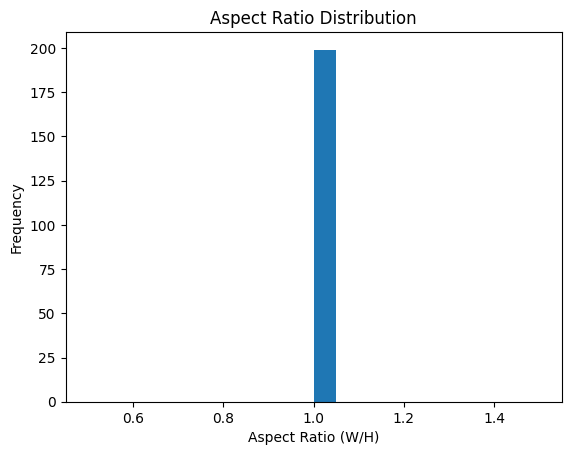

In [ ]:
import matplotlib.pyplot as plt

plt.hist(aspect_ratios, bins=20)
plt.xlabel("Aspect Ratio (W/H)")
plt.ylabel("Frequency")
plt.title("Aspect Ratio Distribution")
plt.show()


In [ ]:
label_paths = glob(os.path.join(dataset_folder_path, 'train', 'labels', '*.txt'))

box_widths, box_heights = [], []

for label_file in label_paths:
    with open(label_file, 'r') as f:
        for line in f.readlines():
            _, x, y, w, h = map(float, line.strip().split())
            box_widths.append(w)
            box_heights.append(h)

print("Bounding box (normalized YOLO format):")
print(f"Width  → min: {min(box_widths):.4f}, mean: {np.mean(box_widths):.4f}")
print(f"Height → min: {min(box_heights):.4f}, mean: {np.mean(box_heights):.4f}")


Bounding box (normalized YOLO format):
Width  → min: 0.0164, mean: 0.0464
Height → min: 0.0211, mean: 0.0518


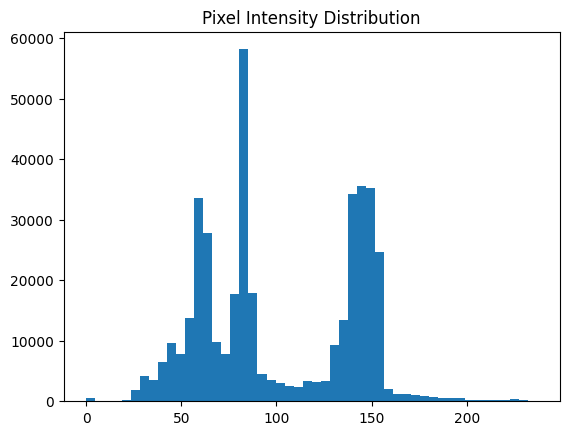

In [ ]:
# Check lighting and contrast

sample_img = cv2.imread(train_images[0])
gray = cv2.cvtColor(sample_img, cv2.COLOR_BGR2GRAY)

plt.hist(gray.flatten(), bins=50)
plt.title("Pixel Intensity Distribution")
plt.show()


### Test Video Analysis - EDA

### Test Video Loading

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 15.9 MB/s eta 0:00:00


In [1]:
import os

def get_video_files(folder_path):
    """
    Returns a list of actual video file paths within a given folder, filtering out macOS specific files.
    """
    video_extensions = ('.mp4', '.avi', '.mov', '.mkv', '.flv', '.wmv', '.webm', '.3gp', '.mpeg', '.ogv')
    video_files = []

    if not os.path.exists(folder_path):
        print(f"Error: The path '{folder_path}' does not exist. Please check the path and try again.")
        return []

    print(f"Searching for video files in: {folder_path}")
    for root, _, files in os.walk(folder_path):
        for file in files:
            # Exclude macOS resource fork files (prefixed with ._) and files inside __MACOSX directory
            if not file.startswith('._') and '__MACOSX' not in root:
                if file.lower().endswith(video_extensions):
                    video_files.append(os.path.join(root, file))

    if not video_files:
        print(f"No actual video files found with extensions {video_extensions} in '{folder_path}' or its subdirectories after filtering.")

    return video_files

# Re-define extract_dir as it might have been lost in the kernel state
extract_dir = '/content/drive/MyDrive/unzipped_videos'

# Re-populate video_file_paths using the defined get_video_files function
video_file_paths = get_video_files(extract_dir)

Searching for video files in: /content/drive/MyDrive/unzipped_videos


In [ ]:
from ultralytics import YOLO
import numpy as np
import cv2

# Correctly define the path to the best performing model weights
# model_path = 'runs/train/cricket_ball/weights/best.pt'
model_path = '/content/best.pt'

# Load the YOLO model from the correct path
model = YOLO(model_path)

ball_sizes = []

# Use 'video_file_paths' from the earlier step, which contains the list of unzipped video files.
# Sample 1-2 videos, or more if needed, ensuring video_file_paths is not empty.
# Added a check for video_file_paths being empty to prevent errors if no videos were found.
if not video_file_paths:
    print("No video files found to analyze.")
else:
    for video_path in video_file_paths[:2]:  # Sample 1–2 videos
        cap = cv2.VideoCapture(video_path)
        frame_count = 0

        if not cap.isOpened():
            print(f"Error: Could not open video file: {video_path}")
            continue

        while cap.isOpened() and frame_count < 200: # Process up to 200 frames per video
            ret, frame = cap.read()
            if not ret:
                break

            # Perform prediction on the frame
            results = model.predict(frame, conf=0.25, verbose=False)

            # Extract bounding box sizes if detections are made
            # Check if results[0].boxes exists and contains detections
            if results and results[0].boxes and len(results[0].boxes.xyxy) > 0:
                for box in results[0].boxes.xyxy.cpu().numpy():
                    x1, y1, x2, y2 = box
                    ball_sizes.append((x2 - x1, y2 - y1))

            frame_count += 1

        cap.release()

# Check if ball_sizes list is populated before calculating statistics
if ball_sizes:
    print("Mean ball size (pixels):", np.mean(ball_sizes, axis=0))
    print("Min ball size (pixels):", np.min(ball_sizes, axis=0))
    print("Max ball size (pixels):", np.max(ball_sizes, axis=0))
    print("Standard deviation of ball sizes (pixels):", np.std(ball_sizes, axis=0))
else:
    print("No ball detections were made in the sampled videos to calculate size statistics.")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Mean ball size (pixels): [     71.219      81.798]
Min ball size (pixels): [     70.373      77.814]
Max ball size (pixels): [     72.551      86.264]
Standard deviation of ball sizes (pixels): [    0.80383      2.9537]


In [ ]:
detections = 0
frames = 0

cap = cv2.VideoCapture(video_file_paths[0])

while frames < 300:
    ret, frame = cap.read()
    if not ret:
        break

    results = model.predict(frame, conf=0.15, verbose=False)
    # if len(results[0].boxes) > 0:
    if results[0].boxes is not None and len(results[0].boxes.xyxy) > 0:
        detections += 1

    frames += 1

cap.release()

print(f"Detection rate: {detections / frames:.2f}")


Detection rate: 0.04


In [ ]:
centers = []

cap = cv2.VideoCapture(video_file_paths[0])
frames = 0

while frames < 300:
    ret, frame = cap.read()
    if not ret:
        break

    results = model.predict(frame, conf=0.15, verbose=False)

    if results[0].boxes is not None and len(results[0].boxes.xyxy) > 0:
        # Take the highest confidence detection
        box = results[0].boxes.xyxy[0].cpu().numpy()
        x1, y1, x2, y2 = box
        centers.append(((x1 + x2) / 2, (y1 + y2) / 2))

    frames += 1

cap.release()

centers = np.array(centers)

velocity = np.diff(centers, axis=0)
speed = np.linalg.norm(velocity, axis=1)

print("Mean pixel velocity:", speed.mean())
print("Max pixel velocity:", speed.max())


Mean pixel velocity: 13.335515
Max pixel velocity: 69.15878


### Sanity Check

Strategy:

* Run YOLO on a single test video

* Use very low confidence threshold

* Draw:

  - Bounding box

  - Centroid

  - Frame index

* Save a short annotated clip (10–15 seconds)


This step directly validates:

* “Detect the cricket ball centroid” ✅

* Frame-wise annotation feasibility ✅

* Processed video generation ✅

In [ ]:
## Model Load
from ultralytics import YOLO
import cv2

model = YOLO("/content/best.pt")


In [ ]:
video_path = video_file_paths[2]
cap = cv2.VideoCapture(video_path)

fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

out = cv2.VideoWriter(
    "sanity_check_detection.mp4",
    cv2.VideoWriter_fourcc(*"mp4v"),
    fps,
    (width, height)
)

frame_idx = 0
MAX_FRAMES = int(fps * 10)  # ~10 seconds

while cap.isOpened() and frame_idx < MAX_FRAMES:
    ret, frame = cap.read()
    if not ret:
        break

    results = model.predict(frame, conf=0.05, verbose=False)

    if results[0].boxes is not None and len(results[0].boxes.xyxy) > 0:
        # Take highest confidence detection
        box = results[0].boxes.xyxy[0].cpu().numpy()
        x1, y1, x2, y2 = map(int, box)

        cx = int((x1 + x2) / 2)
        cy = int((y1 + y2) / 2)

        # Draw bounding box
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Draw centroid
        cv2.circle(frame, (cx, cy), 5, (0, 0, 255), -1)

        # Label
        cv2.putText(
            frame,
            f"Ball | Frame {frame_idx}",
            (x1, y1 - 10),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.6,
            (0, 255, 0),
            2
        )

    out.write(frame)
    frame_idx += 1

cap.release()
out.release()

print("Sanity check video saved as sanity_check_detection.mp4")


Sanity check video saved as sanity_check_detection.mp4


### Kalman Filter (Constant Velocity)

In [2]:
import numpy as np

class KalmanFilterCV:
    def __init__(self, dt):
        # State: [x, y, vx, vy]
        self.dt = dt

        self.x = np.zeros((4, 1))  # state vector
        self.P = np.eye(4) * 500   # covariance

        self.F = np.array([
            [1, 0, dt, 0],
            [0, 1, 0, dt],
            [0, 0, 1,  0],
            [0, 0, 0,  1]
        ])

        self.H = np.array([
            [1, 0, 0, 0],
            [0, 1, 0, 0]
        ])

        self.Q = np.diag([1, 1, 25, 25])   # process noise
        self.R = np.diag([9, 9])           # measurement noise

    def predict(self):
        self.x = self.F @ self.x
        self.P = self.F @ self.P @ self.F.T + self.Q
        return self.x[:2].flatten()

    def update(self, z):
        z = np.array(z).reshape(2, 1)
        y = z - (self.H @ self.x)
        S = self.H @ self.P @ self.H.T + self.R
        K = self.P @ self.H.T @ np.linalg.inv(S)
        self.x = self.x + (K @ y)
        self.P = (np.eye(4) - K @ self.H) @ self.P


In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 20.2 MB/s eta 0:00:00


## Model Loading and Inferencing on Test Videos

In [4]:
import cv2
import csv
import numpy as np
from ultralytics import YOLO

# ---------------- CONFIG ----------------
CONF_THRES = 0.05
MIN_MOTION_PX = 5
INIT_CONSEC_FRAMES = 3
MAX_PRED_FRAMES = 1  # 5 previously
# ----------------------------------------

# Load trained YOLO model
model = YOLO("/content/best.pt")

video_path = video_file_paths[0]
cap = cv2.VideoCapture(video_path)

fps = cap.get(cv2.CAP_PROP_FPS)
dt = 1 / fps
W = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
H = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

out = cv2.VideoWriter(
    "tracked_output.mp4",
    cv2.VideoWriter_fourcc(*"mp4v"),
    fps,
    (W, H)
)

csv_file = open("annotations.csv", "w", newline="")
writer = csv.writer(csv_file)
writer.writerow(["frame", "x", "y", "visible"])

kf = KalmanFilterCV(dt)
trajectory = []

# Tracker state
initialized = False
consec_valid = 0
prev_center = None
frames_since_detection = 0

MIN_DETECTION_FOR_TRACK = 5 # evidence threshold
detection_count = 0
frame_idx = 0

# ---------------- MAIN LOOP ----------------
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    detection = None
    center = None
    visible = 0

    # ---------------- YOLO DETECTION ----------------
    results = model.predict(frame, conf=CONF_THRES, verbose=False)

    if results[0].boxes is not None and len(results[0].boxes.xyxy) > 0:
        box = results[0].boxes.xyxy[0].cpu().numpy()
        x1, y1, x2, y2 = box
        cx, cy = int((x1 + x2) / 2), int((y1 + y2) / 2)

        if cy < 0.15 * H:
            detection = None
        else:
            if not initialized:
                # Before init → trust YOLO loosely
                detection = (cx, cy)
            else:
                # After init → motion gating
                motion = np.linalg.norm(np.array([cx, cy]) - np.array(prev_center))
                if motion >= MIN_MOTION_PX:
                    detection = (cx, cy)

        if detection is not None:
              detection_count += 1



    if not initialized:
        if detection is not None:
            consec_valid += 1
            prev_center = detection

            if consec_valid >= INIT_CONSEC_FRAMES and detection_count >=MIN_DETECTION_FOR_TRACK:
                # Initialize Kalman with first reliable detection
                kf.x[:2] = np.array(detection).reshape(2, 1)
                kf.x[2:] = 0
                initialized = True
                trajectory.clear()
                frames_since_detection = 0
        else:
            consec_valid = 0


        # During initialization → always invisible
        writer.writerow([frame_idx, -1, -1, 0])

    # ---------------- TRACKING ----------------
    else:
        if detection is not None:
            kf.update(detection)
            center = detection
            prev_center = center
            frames_since_detection = 0
            visible = 1
        else:
            frames_since_detection += 1
            if frames_since_detection <= MAX_PRED_FRAMES:
                center = kf.predict()
                visible = 0
            else:
                # Lost track → reset cleanly
                initialized = False
                consec_valid = 0
                prev_center = None
                trajectory.clear()
                writer.writerow([frame_idx, -1, -1, 0])
                out.write(frame)
                frame_idx += 1
                continue

        # ---------------- OUTPUT ----------------
        if center is not None:
            cx, cy = int(center[0]), int(center[1])
            trajectory.append((cx, cy))
            writer.writerow([frame_idx, cx, cy, visible])

            # Draw centroid
            cv2.circle(frame, (cx, cy), 5, (0, 0, 255), -1)

            # Draw trajectory
            for i in range(1, len(trajectory)):
                cv2.line(frame, trajectory[i-1], trajectory[i], (255, 0, 0), 2)
        else:
            writer.writerow([frame_idx, -1, -1, 0])

    out.write(frame)
    frame_idx += 1

# ---------------- CLEANUP ----------------
cap.release()
out.release()
csv_file.close()

print("✅ Tracking complete")
print("→ Video: tracked_output.mp4")
print("→ CSV  : annotations.csv")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
✅ Tracking complete
→ Video: tracked_output.mp4
→ CSV  : annotations.csv
